#KLASIFIKASI DATA FASHION MNIST MENGGUNAKAN CNN

PENGENALAN DATA

data yang digunakan kali ini merupakan data Fashion MNIST yaitu merupakan  dataset yang terdiri dari 10 kategori fashion sebagai berikut:

T-Shirt/Tops = 0 

Trouser = 1

Pullover = 2

Dress = 3

Coat = 4

Sandal = 5

Shirt = 6

Sneaker = 7

Bag = 8

Ankle Boot = 9

dimana Tiap kategori terdiri dari 6.000 images untuk training dan 1.000 images untuk testing. Jadi total untuk training data ada 60.000 images dan 10.000 untuk testing data.





DESKRIPSI DATA

 setiap image dalam fashion mnist dataset memiliki 28 pixel kebawah dan 28 pixel kesamping sehingga totalnya memiliki 784 pixel. Setiap pixel memiliki nilai angka tersendiri yang mewakili gelap dan cerahnya suatu gambar. Semakin tinggi angka pixel, maka semakin gelap gambarnya. Sebaliknya, semakin rendah angka pixel maka semakin cerah gambarnya. Nilai pixel ini tersebar dalam bentuk angka integer antara 0 s/d 255.
 
 Training dan testing data memiliki 785 kolom, kolom pertama menunjukkan label, dan sisanya merupakan nilai pixel


#DOWNLOAD DAN IMPORT DATA SET

A. DOWNLOAD DATASET

data didownload menggunakn fungsi wget dan akan secara otomatis tersimpan dalam google drive

In [0]:
!wget https://bitbucket.org/dehex/dataset/raw/a5f8c0d3a7e6a132491d996df704c2118f946f8b/fashionmnist.zip

--2019-08-20 14:45:01--  https://bitbucket.org/dehex/dataset/raw/a5f8c0d3a7e6a132491d996df704c2118f946f8b/fashionmnist.zip
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72114606 (69M) [application/zip]
Saving to: ‘fashionmnist.zip’

fashionmnist.zip    100%[===================>]  68.77M  51.1MB/s    in 1.3s    

2019-08-20 14:45:05 (51.1 MB/s) - ‘fashionmnist.zip’ saved [72114606/72114606]



In [0]:
#unzip dataset
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
  inflating: t10k-images-idx3-ubyte  
  inflating: fashion-mnist_test.csv  
  inflating: train-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-labels-idx1-ubyte  


B. IMPORT LIBRARY

beberapa library yang digunakan untuk analisis data fashion mnist menggunakan cnn adalah sebagai berikut

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AveragePooling2D, BatchNormalization

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

C. MENENTUKAN PARAMETER

In [0]:
img_rows = 28 #jumlah row dalam 1 image
img_cols = 28 #jumlah kolom dalam 1 image
num_classes = 10 #jumlah target class
test_size = 0.2 #untuk split data
random_state = 2018

epochs = 30 #jumlah iterasi(pengulangan pembelajaran)
batch_size = 128 #jumlah image yang dimasukkan dalam sekali iterasi

Script diatas merupakan penentuan awal dari beberapa parameter yang dibutuhkan didalam model CNN. Input gambar pada model ini adalah 28 x 28. Untuk 

batch_sizenya berukuran 128. Batch Size adalah jumlah sampel yang disebarkan ke dalam arsitektur neural network.

test_size adalah pembagian yang akan digunakan dalam mensplit data menjadi data training dan data validasi.

terakhir, no_epoch merupakan jumlah pengulangan dalam pembelajaran

D. MELIHAT DATASET

untuk melihat secara detail , dapat menggunakan pd.read_csv

In [0]:
fashion_train = pd.read_csv("/content/fashion-mnist_train.csv",
                     sep=",")

fashion_test = pd.read_csv("/content/fashion-mnist_test.csv",
                     sep=",")
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


sebelum membuat model deep learning dan mentraining dataset, dataset perlu dieksplorasi terlebih dahulu untuk mengetahui dan memahami lebih mendalam mengenai informasi dalam dataset, sehingga dapat menentukan langkah preprocessing yang harus digunakan.

untuk mngetahui total dimensi dataset dapat dilakukan melalui

In [0]:
print("Fashion MNIST train -  rows:",fashion_train.shape[0]," columns:", fashion_train.shape[1])

print("Fashion MNIST test -  rows:",fashion_test.shape[0]," columns:", fashion_test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


sedangkan label memiliki 10 kategori yaitu 0-9

In [0]:
fashion_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

selanjutkan , menggunakan isnull, terlihat data tidak mempunyai data kosong

In [0]:
#train
fashion_train.isnull().any().sum()

0

In [0]:
#test
fashion_test.isnull().any().sum()

0

Kemudian, menggunakan value counts,  data dianalisis apakah ada ktidakseimbangan dalam persebaran data terhadap label, dan didapatkan data yang seimbang

In [0]:
#train
fashion_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [0]:
#test
fashion_test['label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

lebih lengkapnya

In [0]:
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Angkle Boot'}

def distribusi_kelas(data):
  counts = data['label'].value_counts() #menghitung jumlah nilai data pada setiap label
  total = len(data)
  
  for i in range(len(counts)):
    label = labels[counts.index[i]] #mengambil label pada index i
    count = counts.values[i] #mengambil jumlah data dari label i
    percent = (count/total) * 100
    print ( ' {:<20s}: {} or {}%'.format(label,count, percent))
    
print(' distribusi fashion_train')
distribusi_kelas(fashion_train)
print('\n')
print(' distribusi fashion_test')
distribusi_kelas(fashion_test)

 distribusi fashion_train
 Angkle Boot         : 6000 or 10.0%
 Bag                 : 6000 or 10.0%
 Sneaker             : 6000 or 10.0%
 Shirt               : 6000 or 10.0%
 Sandal              : 6000 or 10.0%
 Coat                : 6000 or 10.0%
 Dress               : 6000 or 10.0%
 Pullover            : 6000 or 10.0%
 Trouser             : 6000 or 10.0%
 T-shirt/top         : 6000 or 10.0%


 distribusi fashion_test
 Sneaker             : 1000 or 10.0%
 Shirt               : 1000 or 10.0%
 Sandal              : 1000 or 10.0%
 Coat                : 1000 or 10.0%
 Dress               : 1000 or 10.0%
 Pullover            : 1000 or 10.0%
 Angkle Boot         : 1000 or 10.0%
 Trouser             : 1000 or 10.0%
 Bag                 : 1000 or 10.0%
 T-shirt/top         : 1000 or 10.0%


untuk secara lebih dekat gambar dari dataset kita bisa melakukan sebagi berikut

fashion_train


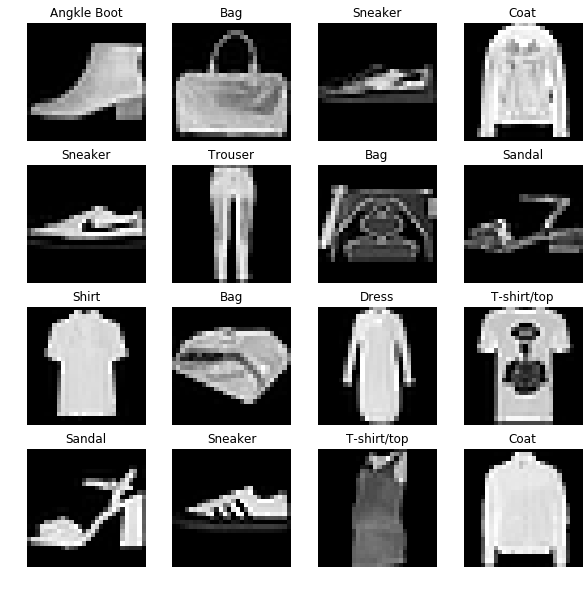

In [0]:
def random_images(data):
  fig, axes = plt.subplots(4, 4, figsize = (10,10))
  for row in axes:
     for axe in row:
        index = np.random.randint(data.shape[0]) #mengambil index secara random sesuai dengan jumlah data
        img = data.drop('label', axis=1).values[index].reshape(28,28) #label dihilangkan lalu ambil nilai berdasarkan index dan direshape ke ukuran 28 x 28
        cloths = data['label'][index] #mengambil data label berdasarkan index
        axe.imshow(img, cmap='gray')
        axe.set_title(labels[cloths])
        axe.set_axis_off()

print('fashion_train')
random_images(fashion_train)



sedangkan untuk data fashion_test

fashion_test


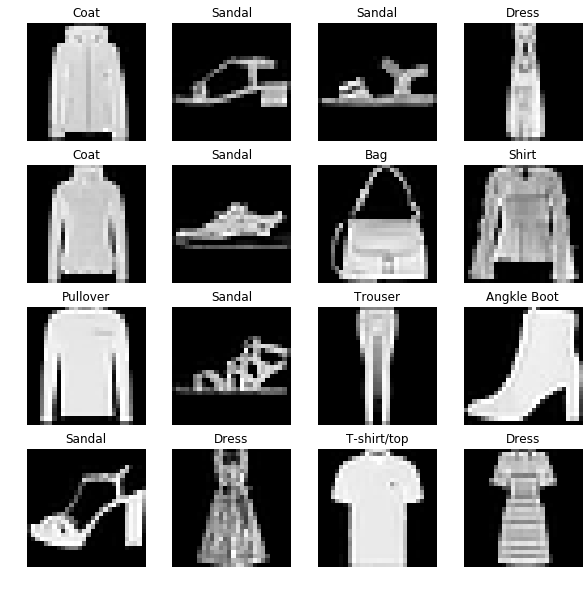

In [0]:
print('fashion_test')
random_images(fashion_test)

#PREPROCESSING DATA

setelah melihat data, selanjutnya dilakukan preprocessing data sebelum melakukan training,

karena data tidak ada yang kosong, maka tidak perlu tahap memasukkan data seperti mean dan median, selain itu karena data seimbang maka tidak perlu ada langkah untuk mengatasi data tidak seimbang

untuk tahap awal preprocessing data adalah sebagai berikut:

1. data dalam kolom label dilakukan one hot encoding

2. data selain kolom label dirubah menjadi bentuk array agar dapat dimasukkan ke dalam input

2. data  array tersebut kemudian di reshape menjadi ukuran 28 x 28 x 1 untuk nanti digunakan dalam input model, nilai 1 menunjukkan channel 1 karena data berupa grayscale.

3. selanjutnya data dirubah dalam bentuk float, hal ini dilakukan agar tidak terjadi pembulatan angka misal angka 0,22 menjadi nilai 0

4.  terakhir dilakukan rescale membagi dengan 255 adalah dengan mengubah setiap nilai pixel dari jangkauan [0,255] menjadi [0,1]

In [0]:
def preprocessing_data(data):
  y = to_categorical(data.label, num_classes)
  jumlah_images = data.shape[0]
  array_x = data.values[:,1:]
  shaped_array_x = array_x.reshape(jumlah_images, img_rows, img_cols, 1)
  x = shaped_array_x.astype('float32')/255
  return x, y

X, y = preprocessing_data(fashion_train)
test_X, test_y = preprocessing_data(fashion_test)
  

In [0]:
X[0:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [0]:
y[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

A. SPLIT DATA MENJADI DATA TRAIN DAN DATA VALIDASI

Bagian data fashion_train(x,y), di split menjadi data train dan data validasi.

data train digunakan untuk melatih model yang dibuat dan data validasi digunakan untuk mengevaluasi peforma model yang dibuat terhadap dataset

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = test_size, random_state = random_state)

dari split diatas, didapatkan dimensi data sebagai berikut

In [0]:
#dimension
print('Fashion MNIST train - rows:', X_train.shape[0], ' columns:', X_train.shape[1:4])
print('Fashion MNIST valid - rows:', X_val.shape[0], ' columns:', X_val.shape[1:4])
print('Fashion MNIST test - rows:', test_X.shape[0], ' columns:', test_X.shape[1:4])

Fashion MNIST train - rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid - rows: 12000  columns: (28, 28, 1)
Fashion MNIST test - rows: 10000  columns: (28, 28, 1)


#MELATIH MODEL DEEP LEARNING

A. MEMBANGUN ARSITEKTUR CNN

1. Pertama, kita gunakan model Sequential keras yang mana merupakan bentuk linear dari layers

2. kemudian kita memasukkan layer konvolusi, layer konvolusi diatur dimana kedalamannya sama dengan input, jumlah kernelnya sebanyak 32 dengan ukuran kernelnya 3,3 dan aktivasi menggunakan relu yang bertujuan melakukan 'treshold' dari 0  hingga infinity untuk setiap data (jika ada nilai negatif dirubah menjadi 0), lalu kernel_initializer untuk mengatur cara weight mendapatkan nilai, padding = 'same' yang berarti tidak ada penambahan matrix pada input dan terakhir dimasukkan inputnya

3. pada tahap konvolusi kedua, digunakan kernel dengan jumlah 5 x 5 dengan jumlah kernelnya 32 dengan padding = 'same' dan aktivation relu

4. tahap ketiga dimasukkan layer average pooling, dimana merupakan proses mengurangi dimensi dari feature map(downsampling) dimana sizenya (2,2), averagePooling berarti yang masuk ke layer selanjutnya merupakan rata2x yang data yang dipooling, terakhir , strides merupakan hal yang mengatur bagaimana layer pooling bergerak, (2,2) berarti pooling bergerak sebanyak 2 height dan 2 weight.

5. untuk menghindari overfitting kita memasukkan dropout dengan rate 0,5

6. dilakukan konvolusi kembali dengan jumlah layer 64, yang kemudian diikuti average pooling dan dropout dengan pengaturan yang sama

7. data lalu diflatten dan dijadikan satu dimensi array

8. dimasukkan layer dengan jumlah 1024 dengan activasi relu dan dilanjutkan dengan dropout dengan rate =0.7

9. terakhir  Fully Connected (*10 layer) dan aktivasi softmax, biasa digunakan dalam multiclass

In [0]:
# Model

# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='same',
                 activation=tf.nn.relu,
                 kernel_initializer='he_normal', #mengambil sampel menggunakan bentuk distribusi normal
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(32, kernel_size=(5, 5),
                 padding='same',
                 activation=tf.nn.relu))
model.add(AveragePooling2D((2, 2), strides=(2,2), padding='same')) #karena maxpooling digunakan untuk features yang extreme, kontras, average memperjelas bentuk gambar
model.add(Dropout(0.5))
model.add(Conv2D(64, 
                 kernel_size=(5, 5),
                 padding='same',
                 activation=tf.nn.relu))
model.add(AveragePooling2D((2, 2), strides=(2,2), padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation=tf.nn.relu))
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation=tf.nn.softmax)) #aktivasi menggunakan softmax karena outputnya merupakan multiclass


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

W0820 15:00:17.827371 139926776895360 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


untuk compile model diatas, kita menggunakan 'categorical_crosentropy' untuk menghitung loss pada klasifikasi multiclass, optimizer adam dan accuracy untuk mengevaluasi akurasi dari model yang dibuat

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

model yang telah dibuat difit kan dengan dengan data training, 

batch sizenya sebesar 128 maka ketika proses training data, akan diambil sebanyak 128 data secara random dari semua sample dataset untuk setiap epoch(iterasi) hingga semua epoch memenuhi batas sampelnya

In [0]:
#run the model
train_model=model.fit(X_train, y_train, #data training
                     batch_size = batch_size, #jumalh batch
                     epochs = epochs, #jumlah iterasi, epoch=30 berarti akan dilakukan pembelajaran(iterasi) berulang sampai 30 kali
                     verbose=1, # untuk menampilkan nilai accuracy dan loss
                     validation_data = (X_val, y_val)) #data untuk mengevaluasi model

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 9s 181us/sample - loss: 0.6145 - acc: 0.7761 - val_loss: 0.3680 - val_acc: 0.8716
Epoch 2/30
48000/48000 [==============================] - 8s 173us/sample - loss: 0.4048 - acc: 0.8523 - val_loss: 0.3149 - val_acc: 0.8859
Epoch 3/30
48000/48000 [==============================] - 8s 174us/sample - loss: 0.3488 - acc: 0.8712 - val_loss: 0.2860 - val_acc: 0.9006
Epoch 4/30
48000/48000 [==============================] - 8s 173us/sample - loss: 0.3157 - acc: 0.8840 - val_loss: 0.2540 - val_acc: 0.9055
Epoch 5/30
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2947 - acc: 0.8901 - val_loss: 0.2483 - val_acc: 0.9100
Epoch 6/30
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2774 - acc: 0.8974 - val_loss: 0.2357 - val_acc: 0.9148
Epoch 7/30
48000/48000 [==============================] - 8s 173us/sample - loss: 0.2637 - acc: 0.9039 - val_l

dari iterasi diatas, didapatkan nilai akurasi training sebesar 0,9340, sedangkan nilai akurasi validasi 0.9374.

terakhir pada prediksi menggunakan data testing (seperti yang ditunjukkan dibawah) didapatkan akurasi sebesar 0.9371 yang menunjukkan tidak terjadi overfitting pada model

In [0]:
#test prediction accuracy
score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.16749244595468044
Test accuracy: 0.9371


Training dan Validation Loss & Accuracy

proses dimana pengecek overfiting, underfitting, dan Just Right
Overfitting jika : training loss >> validation loss
Underfitting jika : training loss << validation loss
Just right jika training loss ~ validation loss


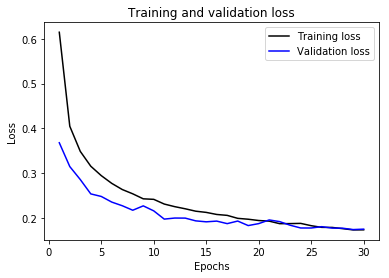

In [0]:
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochss = range(1, len(loss) + 1)
plt.plot(epochss, loss, color='black', label='Training loss')
plt.plot(epochss, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

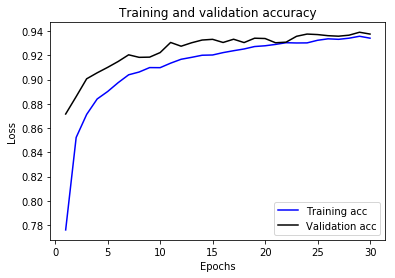

In [0]:
acc = train_model.history['acc']
val_acc = train_model.history['val_acc']
plt.plot(epochss, acc, color='blue', label='Training acc')
plt.plot(epochss, val_acc, color='black', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# CONFUSION MATRIX
untuk mempresentasikan jumlah data prediksi terhadap data testing
Dimana jika urutan baris dan kolom nya sama, maka itu hasil prediksi tersebut benar. Begitu sebaliknya

dengan data testing sebanyak 1000 maka data prediksinya juga harus 1000

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

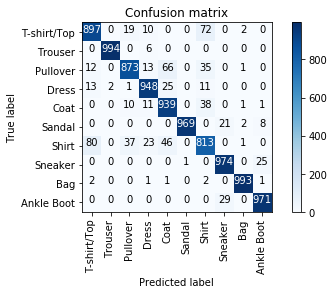

In [0]:

Y_pred = model.predict(test_X)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(test_y,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

# F-1 Score
Digunakan untuk melihat hasil akurasi pada modelling CNN (Convolutional Neural Network). hasil akurasinya adalah 94 %

In [0]:
predicted_classes = model.predict_classes(test_X)

In [0]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]
print(classification_report(Y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.89      0.90      0.90      1000
    Class 1 (Trouser) :       1.00      0.99      1.00      1000
   Class 2 (Pullover) :       0.93      0.87      0.90      1000
      Class 3 (Dress) :       0.94      0.95      0.94      1000
       Class 4 (Coat) :       0.87      0.94      0.90      1000
     Class 5 (Sandal) :       1.00      0.97      0.98      1000
      Class 6 (Shirt) :       0.84      0.81      0.82      1000
    Class 7 (Sneaker) :       0.95      0.97      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
Class 9 (Angkle Boot) :       0.97      0.97      0.97      1000

               accuracy                           0.94     10000
              macro avg       0.94      0.94      0.94     10000
           weighted avg       0.94      0.94      0.94     10000



dari data report diatas terlihat bahwa rata-rata setiap kelas memiliki akurasi diatas 0,80 dimana class trouser terbesar yaitu 1,00 sedangkan yang terendah didapatkan oleh kelas shirt sebesar 0,82,

akurasi keseluruhan didapatkan 0,94

#Visualisasi data prediksi

In [0]:
#menentukan data benar dan salah
p = predicted_classes[:10000]
y = Y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]



Didapatkan benar memprediksi sebanyak 9371 dan salah sebanyak 628 kelas


In [0]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9371
Incorrect predicted classes: 629


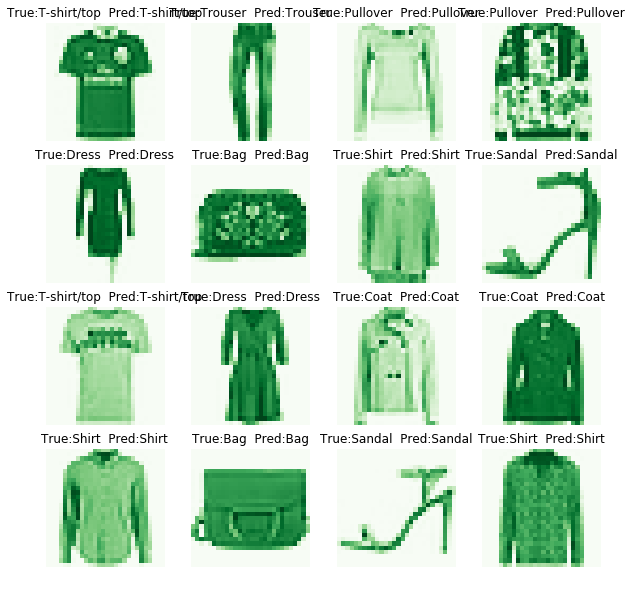

In [0]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(10,10))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test_X[indx].reshape(img_rows,img_cols), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[Y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

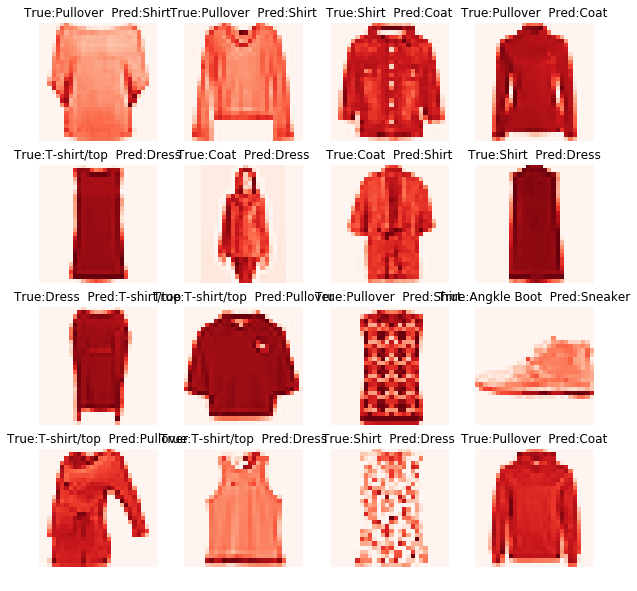

In [0]:
#data yang salah
plot_images(incorrect, "Reds")